Objective:
Using Reviews data to performing NLP process task.Follwed some steps learn about:


1.   Import necessary libraries
2.   Data Acquasition
3.   Preprocessing
4. Text vectorization
5. Modelling


# **Import Libraries**

In [1]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.4 MB/s eta 0:00:00


In [18]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import contractions
import string
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# **Data Acquisition**

In [3]:
df = pd.read_csv('/content/TestReviews.csv')
df.head()

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1


In [17]:
# def color_sentiment(val):
#     """Colors the sentiment column based on the
#     sentiment."""
#     if val == 1:
#       color = 'lightgreen'
#     elif val == 0:
#       color = 'lightcoral'
#     else: # neutral
#       color = 'lightblue'
#     return f'background-color: {color}'
# # Style the DataFrame
# styled_df =df.style.applymap(color_sentiment,
# subset=['class'])
# # Display the styled DataFrame
# styled_df

# **Data visualizations**

Data V

In [ ]:
df.shape

(4321, 2)

/tmp/ipython-input-16-1585684123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index,


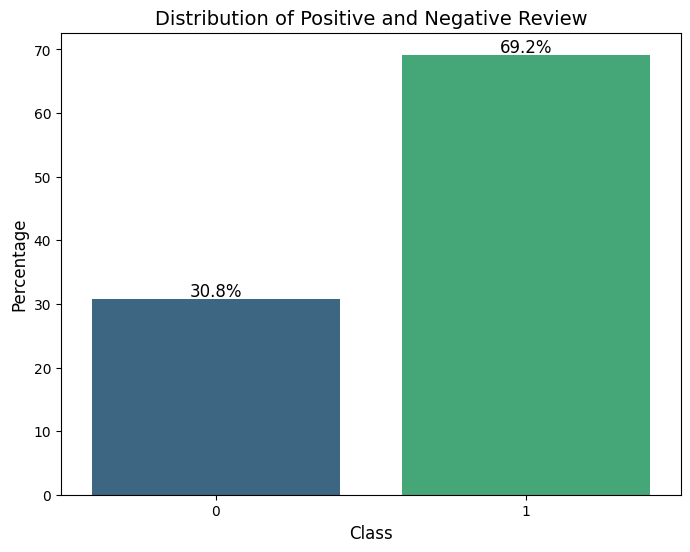

In [16]:
sentiment_counts =df['class'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index,
y=sentiment_counts.values, palette="viridis")
for p in ax.patches:
  ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', fontsize=12,color='black', xytext=(0, 5),textcoords='offset points')
plt.xlabel("Class", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Distribution of Positive and Negative Review", fontsize=14)
plt.show()


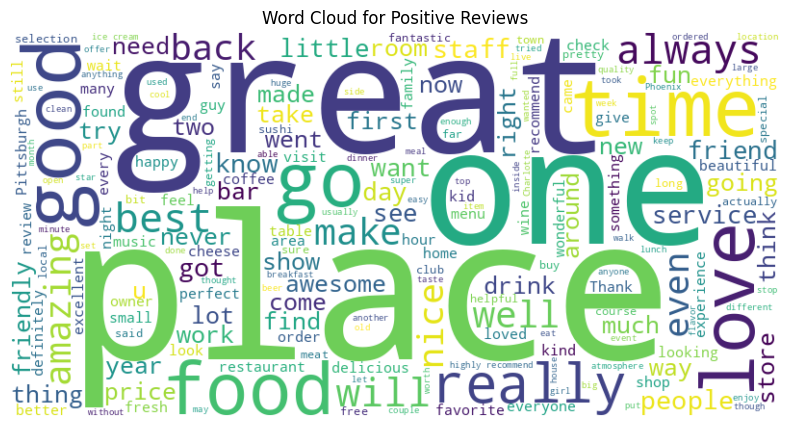

In [21]:
positive_reviews = df[df['class'] ==1]
# Combine all positive reviews into a single string
positive_text = " ".join(positive_reviews['review'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white', stopwords=STOPWORDS).generate(positive_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

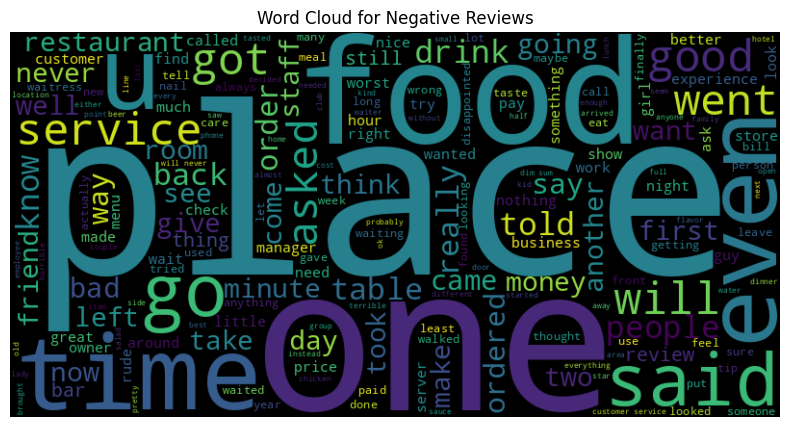

In [23]:

negative_reviews = df[df['class'] == 0]
# Combine all positive reviews into a single string
positive_text = " ".join(negative_reviews['review'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
background_color='black',
stopwords=STOPWORDS).generate(positive_text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [ ]:
df.describe()

,class
count,4321.000000
mean,0.691738
std,0.461829
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df['class'].value_counts()

,count
class,
1,2989
0,1332


In [ ]:
df.isnull().sum()

,0
review,0
class,0


In [ ]:
df_duplicate= df[df.duplicated()==True]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4148, 2)

In [ ]:
df["class"].unique()

array([1, 0])

In [ ]:
df.sample(5)

,review,class
697,I love this place! Great atmosphere and frien...,1
1198,"I created an account just to review this shop,...",1
3292,"Ok, I know that some people really love this c...",0
1600,What the hell Yelp don't got Swish Awww hell n...,1
1545,"Hold up, time for an update on the review. St...",1


In [ ]:
df['review'].iloc[670]

"Scottsdale Artist's School is a great place for a workshop. It was an elementary school at one time and still has an interesting traditional quality with beautiful tile floors, generously sized classrooms, a lovely patio, and a professional staff.The school brings notable artists from all over and students also come from everywhere.The Friends of the School organization gave a reception on Thursday with bountiful food & wine. That night there was a gallery walk in Old Town.I enjoyed my week there. Scottsdale itself doesn't have great appeal though there wasn't time to explore much and that is just as well.\n"

In [ ]:
df['class'].iloc[670]

np.int64(1)

# **Preprocessing**

In [ ]:
df.review[0]

"Fantastic spot for an even or a quite cocktail.  They were swell to host the Yelp crew with a great drink menu and super attentive staff.I'd certainly recommend anything with the purred fruit in it (apple, any of them really)!\n"

### Convert text into lower case






In [ ]:
df['review'] = df['review'].str.lower()

### Remove html tags

In [ ]:
df['review'].sample(1).values[0]

"first time here and we received terrible customer service.  i usually don't write many reviews but as a marketing major i was in shock.  we stood at the counter for several minutes waiting to see about getting a bowling lane and then were cut in front of by a group a people who were eagerly greeted, the guy announcing orders over the intercom sounded absolutely irritated and like he hated life and then when we were finally helped at the counter we were told we could bowl if we could get done in 50 minutes or less.  the whole experience was extremely unpleasant and we will never return and i will never recommend.\n"

In [ ]:
def remove_space(text):
  pattern= r"\s+"
  spaces = re.sub(pattern," ",text)
  return spaces.strip()

In [ ]:
remove_space(df['review'].sample(1).values[0])

"our family celebrated my mother's 80th birthday with a balloon ride. we wanted to fly out of the east valley (chandlergilbert area). aerogelic ballooning was the only one taking off in this area. they have a very safe flying record. shane's experience, great stories, and humor made this a wonderful flight. we thoroughly enjoyed our day and flight. would recommend shane and this company to anyone."

In [ ]:
df['review'] = df['review'].apply(remove_space)

## Remove stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
  sentence = [word for word in text.split() if word not in stop_words]
  return " ".join(sentence)

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df['review']

,review
0,fantastic spot even quite cocktail. swell host...
1,"love, love, love calamari. good spicy. endless..."
2,"love place. stiff martinis cocktails, cheap dr..."
3,everything great cocktail bar be. great locati...
4,"came pirates game, around 5:30ish evening, got..."
...,...
4315,wife late 30s-early 40s find particularly funn...
4316,wife caught show golden nugget heard good thin...
4317,dumbest show ever seen. never laughed 15 minut...
4318,girlfriend went show. absolutely terrible!!!no...


### Expand Contractions

In [ ]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text
    # Output: I am fine. How are you? I did not have lunch. I have been missing you.

In [ ]:
df['review'] = df['review'].apply(expand_contractions)

In [ ]:
df['review'].sample(1).values[0]

'place open!the best food best service. try butter nut squash ravioli. fantastic'

### Remove Punctuation

In [ ]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df['review'].sample(1).values[0]

'cool place stumbled waiting reservation e. surprised comfortable here. guess hip trendy thought! staff friendly wheelchair accessible.'

In [ ]:
def remove_punctuation(text):
     for i in text:
      if i in punctuation:
        text = text.replace(i," ")
     return text



In [ ]:
df2 = df.copy()

In [ ]:
df['review'].sample(1).values[0]

'great german deli sausage housethis little store everything would ever need german, sausages galore! make german style sausages house best sausages ever have. store wooden, looks quaint, selection varied. inside german style deli cold cuts fresh sausage, corner, freezer buy boxes boxes sausages. brats, white sausage, weiners, nothing have. german candy found corner, dried meats side store... pickles wall ginger bread treats aisle. service good, staff friendly.'

In [ ]:
x = 'do not use creditdebit card!bartenders tip self leave even already tip cash!'
remove_punctuation(x)

'do not use creditdebit card bartenders tip self leave even already tip cash '

In [ ]:
df2['review'] = df2['review'].apply(remove_punctuation)

### Remove extra left and right spaces

In [ ]:
df2['review'] = df2['review'].apply(lambda x: x.strip())

### Tokenization

In [ ]:
def tokenize(text):
    return text.split()

# df2['review_tokens'] = df2['review'].apply(tokenize)

In [ ]:
df2['review'].apply(tokenize)

,review
0,"[fantastic, spot, even, quite, cocktail, swell..."
1,"[love, love, love, calamari, good, spicy, endl..."
2,"[love, place, stiff, martinis, cocktails, chea..."
3,"[everything, great, cocktail, bar, be, great, ..."
4,"[came, pirates, game, around, 5, 30ish, evenin..."
...,...
4315,"[wife, late, 30s, early, 40s, find, particular..."
4316,"[wife, caught, show, golden, nugget, heard, go..."
4317,"[dumbest, show, ever, seen, never, laughed, 15..."
4318,"[girlfriend, went, show, absolutely, terrible,..."


# **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df2['review'])

In [ ]:
X.shape

(4148, 19877)

In [ ]:
df2.head()

,review,class
0,fantastic spot even quite cocktail swell host...,1
1,love love love calamari good spicy endless...,1
2,love place stiff martinis cocktails cheap dr...,1
3,everything great cocktail bar be great locati...,1
4,came pirates game around 5 30ish evening got...,1


In [ ]:
y= df2['class']


# **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


# **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8975903614457831
[[167  81]
 [  4 578]]
              precision    recall  f1-score   support

           0       0.98      0.67      0.80       248
           1       0.88      0.99      0.93       582

    accuracy                           0.90       830
   macro avg       0.93      0.83      0.86       830
weighted avg       0.91      0.90      0.89       830

